In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure backend is switched if only plt is imported

# Ensure inline plotting (even though we're saving figures in a non-interactive backend)
%matplotlib inline

# Set seaborn style for plots
sns.set(style="whitegrid")

In [3]:
data_path =  r'C:\Users\DELL\Downloads\india_gdp_loss_covid_simulated.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataset
df.head()

,Date,State,Sector,GDP_Before_COVID,GDP_During_COVID,GDP_Loss_Percent,Unemployment_Rate_Before,Unemployment_Rate_During,Migration_Effect,Recovery_Factor,Govt_Support_Received,Sector_Impact_Score,Health_Index,Lockdown_Severity,Vaccination_Rate,Urban_Rural_Ratio,Inflation_Rate,Population_Affected,Recovery_Progress,Remarks
0,2019-01-01,Himachal Pradesh,Transport,38079.47,33876.70,11.04,5.76,13.188781,0,0.55,797.03,2,56.35,5,28.52,2.08,7.24,453.69,96.16,High Impact
1,2019-01-31,Karnataka,Manufacturing,95120.72,82525.28,13.24,6.31,16.638936,1,0.72,797.03,3,41.95,4,79.29,0.48,8.83,285.24,41.15,High Impact
2,2019-03-02,Maharashtra,Mining,73467.40,58827.93,19.93,8.98,12.230889,1,0.90,797.03,6,53.35,4,93.77,2.06,4.01,440.24,88.13,High Impact
3,2019-04-01,Meghalaya,Mining,60267.19,56326.71,6.54,5.38,8.677830,1,0.90,797.03,1,54.92,1,77.91,1.91,5.46,412.09,96.37,Low Impact
4,2019-05-01,Bihar,Mining,16445.85,11021.45,32.98,9.09,16.658184,0,0.33,797.03,2,60.87,4,60.56,1.53,3.57,40.81,94.89,Low Impact


In [4]:
try:
    df['Date'] = pd.to_datetime(df['Date'])
except Exception as e:
    # Often an error here could be due to misformatted dates
    print(f"Error converting Date column: {e}")

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values.to_dict())

# If necessary, fill or drop missing values (example using fillna for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, fill missing values with a placeholder
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

print("Data types after preprocessing:", df.dtypes.to_dict())

Missing values in each column: {'Date': 0, 'State': 0, 'Sector': 0, 'GDP_Before_COVID': 0, 'GDP_During_COVID': 0, 'GDP_Loss_Percent': 0, 'Unemployment_Rate_Before': 0, 'Unemployment_Rate_During': 0, 'Migration_Effect': 0, 'Recovery_Factor': 0, 'Govt_Support_Received': 0, 'Sector_Impact_Score': 0, 'Health_Index': 0, 'Lockdown_Severity': 0, 'Vaccination_Rate': 0, 'Urban_Rural_Ratio': 0, 'Inflation_Rate': 0, 'Population_Affected': 0, 'Recovery_Progress': 0, 'Remarks': 0}
Data types after preprocessing: {'Date': dtype('<M8[ns]'), 'State': dtype('O'), 'Sector': dtype('O'), 'GDP_Before_COVID': dtype('float64'), 'GDP_During_COVID': dtype('float64'), 'GDP_Loss_Percent': dtype('float64'), 'Unemployment_Rate_Before': dtype('float64'), 'Unemployment_Rate_During': dtype('float64'), 'Migration_Effect': dtype('int64'), 'Recovery_Factor': dtype('float64'), 'Govt_Support_Received': dtype('float64'), 'Sector_Impact_Score': dtype('int64'), 'Health_Index': dtype('float64'), 'Lockdown_Severity': dtype('in

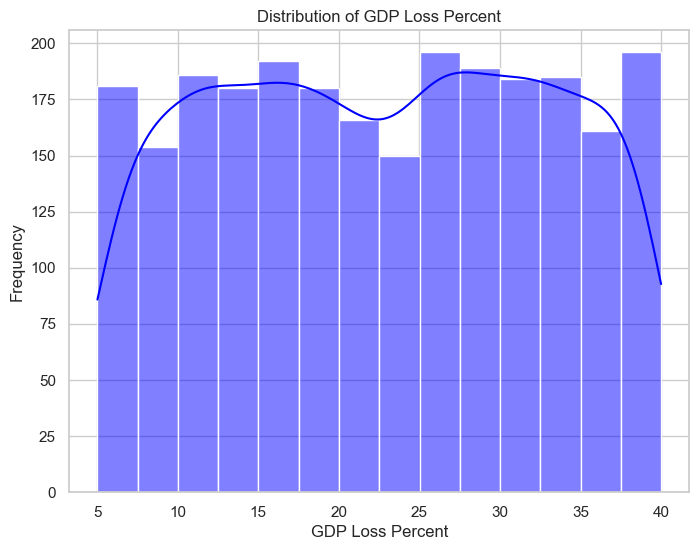

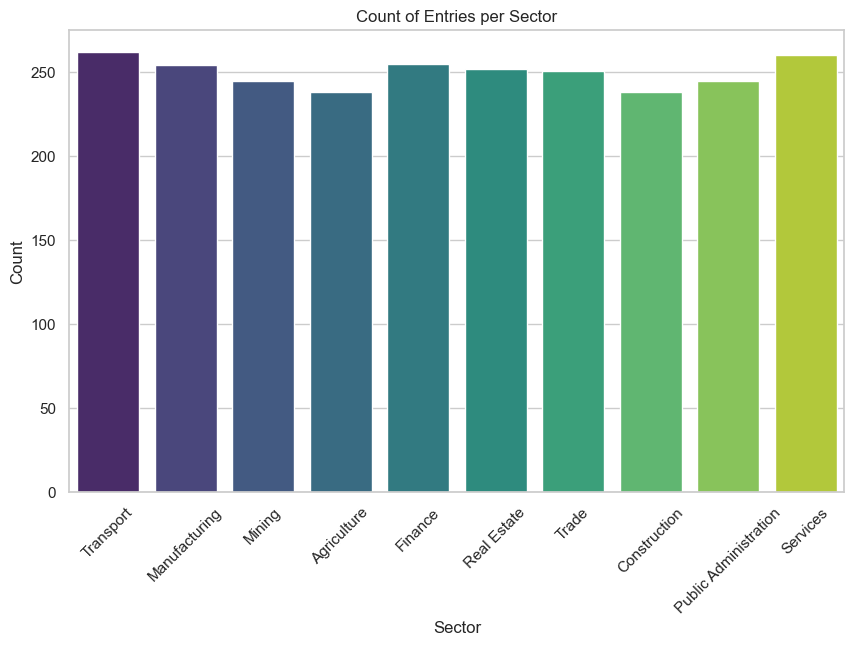

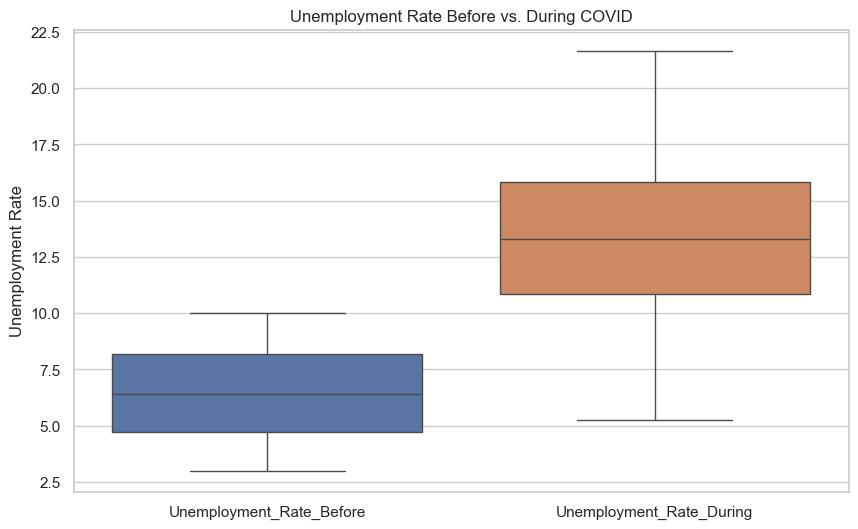

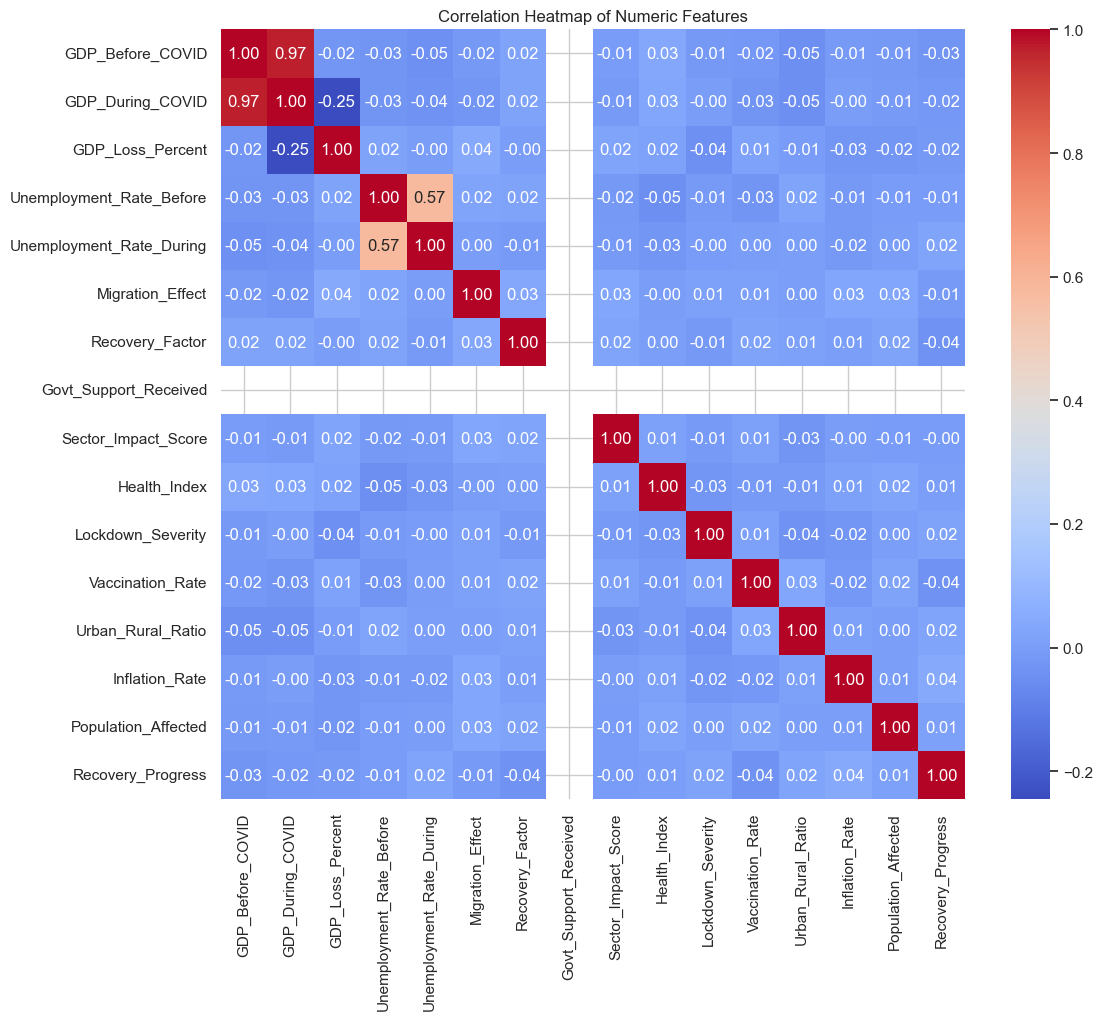

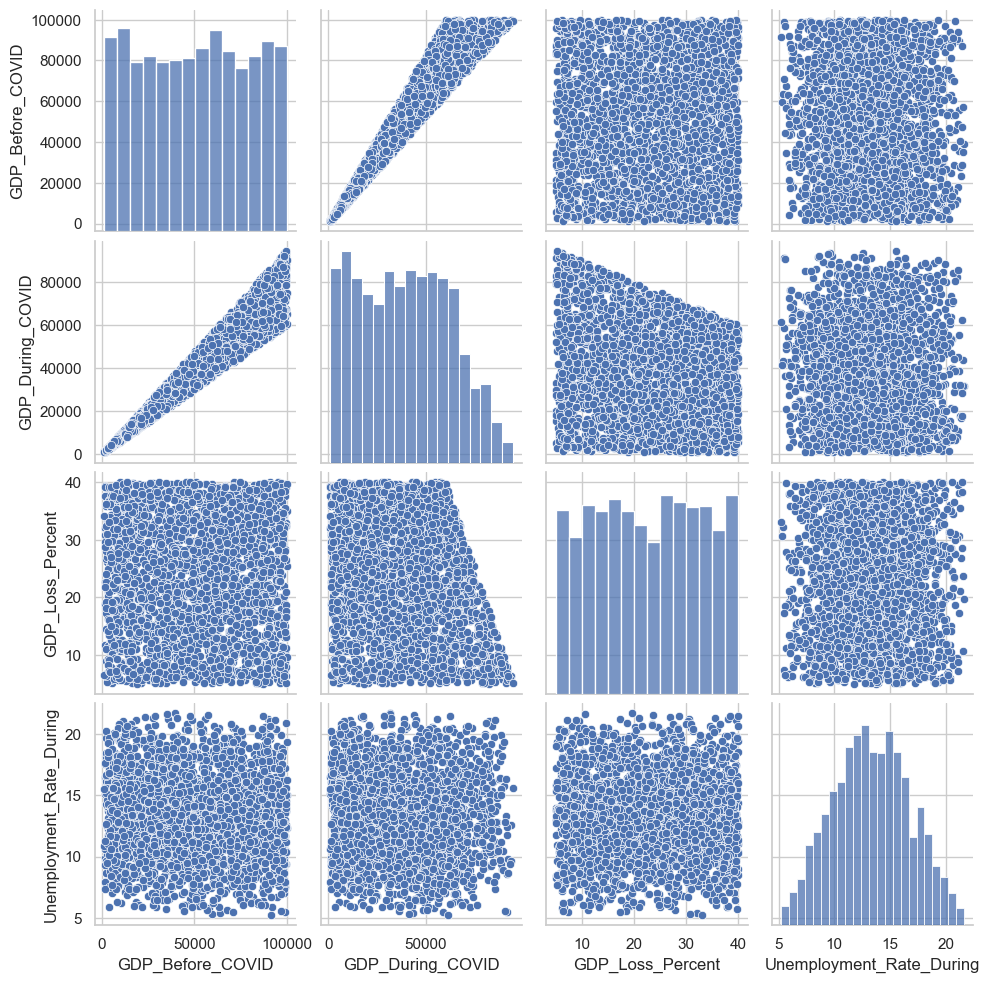

In [5]:
# Histogram for GDP Loss Percent
plt.figure(figsize=(8, 6))
sns.histplot(df['GDP_Loss_Percent'], kde=True, color='blue')
plt.title('Distribution of GDP Loss Percent')
plt.xlabel('GDP Loss Percent')
plt.ylabel('Frequency')
plt.show()

# Count plot for Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sector', palette='viridis')
plt.title('Count of Entries per Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Unemployment Rate Before and During COVID
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Unemployment_Rate_Before', 'Unemployment_Rate_During']])
plt.title('Unemployment Rate Before vs. During COVID')
plt.ylabel('Unemployment Rate')
plt.show()

# Correlation Heatmap if numeric columns are sufficient
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Pair Plot for a subset of relevant numeric columns
subset_cols = ['GDP_Before_COVID', 'GDP_During_COVID', 'GDP_Loss_Percent', 'Unemployment_Rate_During']
sns.pairplot(df[subset_cols])
plt.show()

R2 Score for the Random Forest model: -0.085


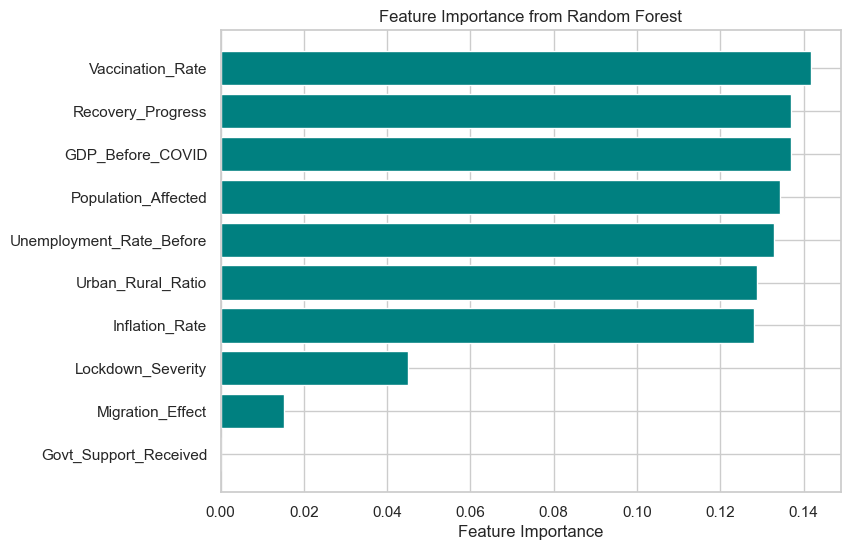

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define feature columns and target variable
# In this example, we use a subset of numeric features as predictors
feature_cols = ['GDP_Before_COVID', 'Unemployment_Rate_Before', 'Migration_Effect', 'Govt_Support_Received', 'Lockdown_Severity', 'Vaccination_Rate', 'Urban_Rural_Ratio', 'Inflation_Rate', 'Population_Affected', 'Recovery_Progress']
target_col = 'GDP_Loss_Percent'

# Check if all the feature columns are available
for col in feature_cols:
    if col not in df.columns:
        raise ValueError(f"Expected column {col} is missing from the dataset.")

# Splitting the data into training and testing sets
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set and calculate R2 score as accuracy measure
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score for the Random Forest model: {r2:.3f}")

# Optional: Feature Importance Plot using Permutation Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center', color='teal')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()